# Complete EDA on Google Playstore Data

# About DataSet

 #### `Discription`: Dataset was downloaded from kagggle from following:[link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)
 #### `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

#### `Content`
Each app (row) has values for catergory, rating, size, and more.

#### `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

#### `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

##### Import the Requied Libraries

In [12]:
# Let's Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
# Let's Turn off the run time Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [14]:
df=pd.read_csv('./Dataset/googleplaystore.csv')

##### Let's have a look on top 5 rows of the dataset

In [15]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


##### Set Options to be maximum for rows and columns

In [16]:

pd.set_option('display.max_rows',None)

##### How much Columns with names

In [17]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##### Lets's Have a look on the shape of the data

In [18]:
df.shape

(10841, 13)

##### let's Print the number of rows and columns

In [19]:
print(f"The Dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataframe has 10841 rows and 13 columns


In [ ]:
df.info()

In [21]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Observation:
In dataset only one column is Numeric i.e Rating but the `Size`,`Price` and `Installs` Columns should be Numeric,So we have to convert these columns into Numeric

## 1.Size Column

##### Let's have a look on the values count of Size Column

In [ ]:
df['Size'].value_counts

#### I can't determine that how many unique values have size column so have a look on unique Vales of Size Column

In [ ]:
df['Size'].unique()

In [ ]:
df['Size'].nunique

#####  `yet determined` that  size column has three kind of unique Values which are with(K,M,Varies with device)

#### Let's check the missing Values in Size Column

In [25]:
df['Size'].isnull().sum()

np.int64(0)

#### `Obervation`: There is no Missing value in Size column

#### Now `let's Confirm` that the `size column` has `3` `unique kinds of values`.

##### Calculate the sum of values which have `M` in the `Size` Column in the dataset

In [26]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

##### Calculate the sum of values which have `k` in the `Size` Column in the dataset

In [27]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

##### Calculate the sum of values which have `Varies with device` in the `Size` Column in the dataset

In [28]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [29]:
# Let's have a sum of values of 'M+ k+ Varies with device' which must equal to total records because there is no missing value in Size Column
1695+316+8830

10841

#### Convert the whole column size into bytes

In [42]:
# Let's define a function
def convert_size(size):
    if isinstance(size,str):
        if 'M' in size:
            return float(size.replace('M',""))*1024*1024
        elif 'k' in size:
            return float(size.replace('k',''))*1024
        elif 'Varies with device' in size:
            return float(np.nan)
    return size

In [31]:
# Lets's Apply the function
df['Size']=df['Size'].apply(convert_size)

##### Rename the column (Size)

In [49]:
df.rename(columns={'Size':'Size_in_Bytes'},inplace=True)

In [36]:
df.head(3)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### Size in Mb

In [59]:
df['Size_in_Bytes'].loc[df["Size_in_Bytes"].str.contains('+')]

PatternError: nothing to repeat at position 0

In [56]:
# using Lambda Function
df['Size_in_Mb']=df['Size_in_Bytes'].apply(lambda x: x/(1024*1024))
# Lambda is one linner function

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


#### 2. Let's have a look on Installs Column

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Installs'].value_counts

<bound method IndexOpsMixin.value_counts of 0               10,000+
1              500,000+
2            5,000,000+
3           50,000,000+
4              100,000+
5               50,000+
6               50,000+
7            1,000,000+
8            1,000,000+
9               10,000+
10           1,000,000+
11           1,000,000+
12          10,000,000+
13             100,000+
14             100,000+
15               5,000+
16             500,000+
17              10,000+
18           5,000,000+
19          10,000,000+
20             100,000+
21             100,000+
22             500,000+
23             100,000+
24              50,000+
25              10,000+
26             500,000+
27             100,000+
28              10,000+
29             100,000+
30             100,000+
31              50,000+
32             100,000+
33             100,000+
34              10,000+
35             100,000+
36             500,000+
37           5,000,000+
38              10,000+
39             500,0

In [ ]:
df['Installs'].nunique()

21

##### `Observation`: There are 21 Unique Values in 'Installs' Column, Values Contain '+'and ',' in them so we have to remove the '+' and ',' from 'Installs' Column.

In [ ]:
# Let's remove the '+' using Lambda function.
df['Installs']=df['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x)

In [ ]:
# Let's remove the ',' using Lambda function.
df['Installs']=df['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x)

In [ ]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

##### Now convert the type of column 'Installs' in int

In [ ]:
df['Installs']=df['Installs'].apply(lambda x:int(x))

In [ ]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
# Making a new column called 'Installs_Category' which have category of the Installs
bins = [-1,0,10,1000,10000,100000,1000000,10000000,10000000000]
labels = ['no','Very Low','Low','Moderate','More than Moderate','High','Very High','Top Notch']
df['Installs_Category'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [ ]:
df['Installs_Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0                  Moderate
1                      High
2                 Very High
3                 Top Notch
4        More than Moderate
5        More than Moderate
6        More than Moderate
7                      High
8                      High
9                  Moderate
10                     High
11                     High
12                Very High
13       More than Moderate
14       More than Moderate
15                 Moderate
16                     High
17                 Moderate
18                Very High
19                Very High
20       More than Moderate
21       More than Moderate
22                     High
23       More than Moderate
24       More than Moderate
25                 Moderate
26                     High
27       More than Moderate
28                 Moderate
29       More than Moderate
30       More than Moderate
31       More than Moderate
32       More than Moderate
33       More than Moderate
34  

### 3. `Price` Column

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'].nunique()

92

In [ ]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

#### Let's have a look how many values contain `$` in `Price Column` 

In [ ]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

#### Let's have a look how many values  which contain other than `$`  

In [ ]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

#### Let's remove the `$` Sign from 'Price Column'

In [ ]:
df['Price']=df['Price'].apply(lambda x:x.replace('$',"") if '$' in str(x) else x)

##### The Datatype of `Price` Column should be in Float,so Let's Convert it into Float and convert the price in PKR

In [ ]:
df['Price']=df['Price'].apply(lambda x:float(x*270.0) if x != 'Free' else 0)

In [ ]:
df['Price'].unique()

array([     0. ,   1347.3,   1077.3,   1887.3,    402.3,    807.3,
         2157.3,   1617.3,    942.3,    537.3,   2697.3,   2022.3,
          267.3,   2430. ,   1482.3,   2700. ,   6747.3,   3237.3,
        21597.3,   4587.3,   4047.3,    270. ,   8097.3,   3507.3,
          672.3,   2967.3,    405. ,   5397.3,   4317.3,   9177.3,
        20247.3,  10797.3,   1066.5,   1212.3,    459. ,   2427.3,
          540. ,   1047.6,   7017.3, 107997.3,   4857.3, 108000. ,
          815.4,    475.2,   1306.8,   1287.9,    434.7,    675. ,
          429.3,   1752.3,    348.3,   1350. ,   3777.3,  80997.3,
       102597.3,  10257.3,   5127.3, 105297.3,   5373. ,   2292.3,
          472.5,   3780. ,   1309.5,  12687.3,  29697.3,  41847.3,
          831.6,    699.3,   1296. ,    529.2,   5238. ,   1053. ,
         1239.3,   4174.2,    820.8,   1158.3,    702. ,    885.6,
         1242. ,   7827.3,    796.5,    783. ,    531.9,  54000. ,
        24297.3,    691.2,   8367.3,    974.7, 106647.3,    34

#### Rename the `Price` column to `Price in PKR` 

In [ ]:
df.rename(columns={"Price":"Price in PKR"},inplace=True)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price in PKR', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_Category'],
      dtype='object')

### The Minimum,Average,Maximum Prices of Apps

In [ ]:
print(f"The Minimum Price in PKR is {df['Price in PKR'].min()}")
print(f"The Average Price in PKR is {df['Price in PKR'].mean()}")
print(f"The Maximum Price in PKR is {df["Price in PKR"].max()}")

The Minimum Price in PKR is 0.0
The Average Price in PKR is 277.36379485287335
The Maximum Price in PKR is 108000.0


### 4: Descriptive Statistics

In [ ]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price in PKR,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,277.363795,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,4306.222121,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,108000.000000,100.000000


#### `Observation`:
##### (1) Now,We have only 6 Columns as Numeric Data type.
##### (2) We can Obsverve their discriptive statistics, and make tons of observations as per our hypothesis
##### (3) We can see that the Rating Column has a minimum value of 1 and maximum value of 5,which is range of rating,and the mean is 4.19 which is good rating.On an average people Gave this rating.
##### (4) We can see that Review column has minimum Value of 0,the Average number of reviews are 444,111.9 and maximum number of reviews are 78,158,336,78+ Million.

#### 4.1 Dealing with Missing Values into the DataFrame

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Genres               1
Type                 1
App                  0
Reviews              0
Installs             0
Price in PKR         0
Content Rating       0
Last Updated         0
dtype: int64

##### The Percentage of missing Values in the Dataframe

In [ ]:
df.isnull().sum()/len(df)*100

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size_in_Bytes     15.635089
Installs           0.000000
Type               0.009224
Price in PKR       0.000000
Content Rating     0.000000
Genres             0.009224
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
Size_in_Mb        15.635089
dtype: float64

The Total Number of Missing Values in the DataSet

In [ ]:
df.isnull().sum().sum()

np.int64(4877)

##### Plot Missing Values 

<Axes: >

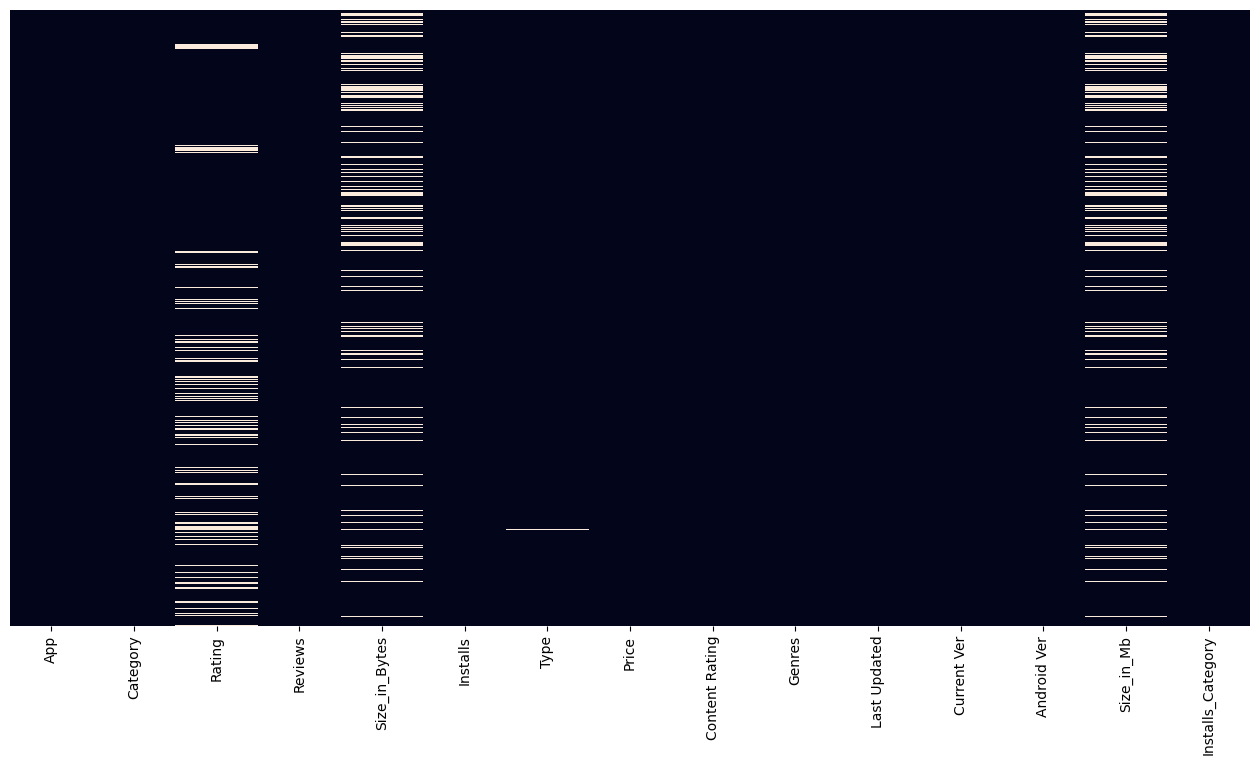

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

##### 4.2 Plot The Percentage of Null Values in Each column of Dataset 

Text(0.5, 1.0, 'The Percentage of missing Values in Each Column')

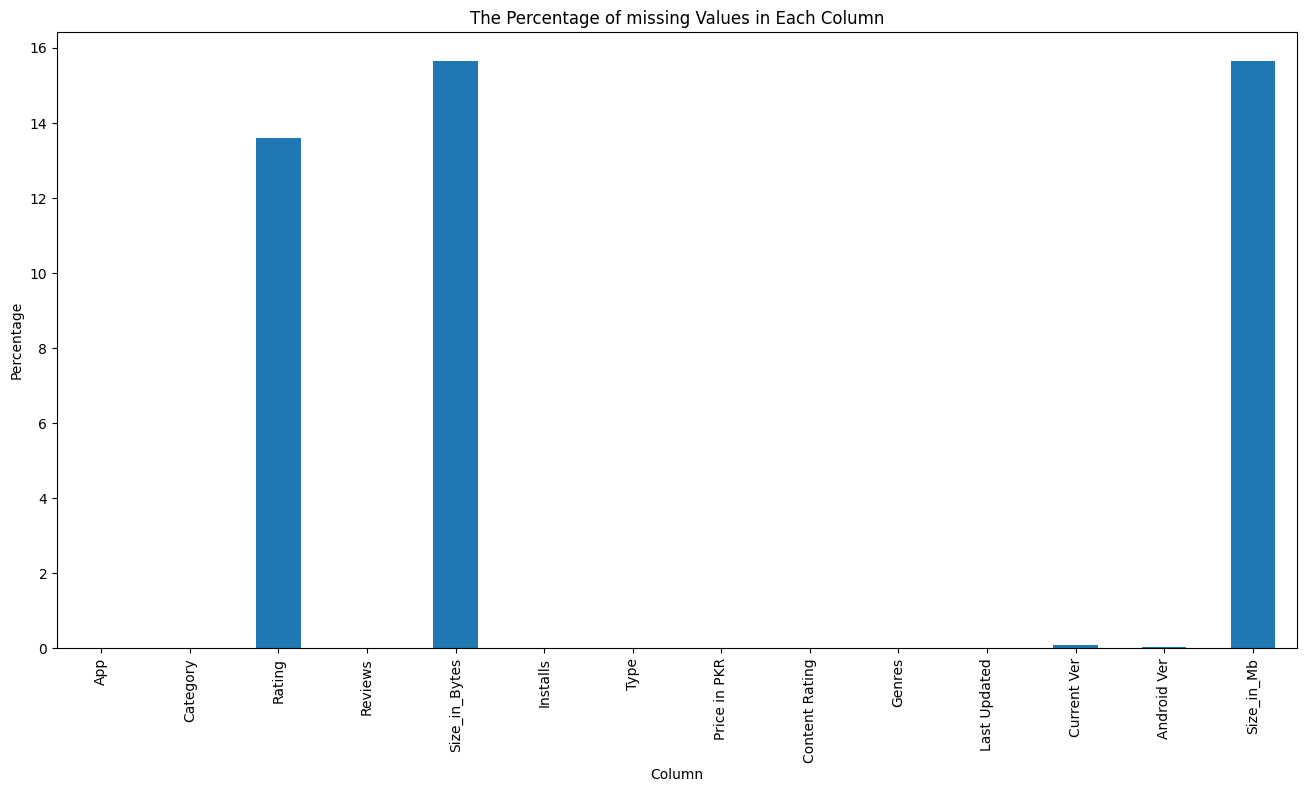

In [ ]:
percentage_missing=df.isnull().sum()/len(df)*100
plt.figure(figsize=(16,8))
percentage_missing.plot(kind='bar')
# Add the label
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.title("The Percentage of missing Values in Each Column")

##### 4.3 Plot the graph of columns which have missing values less than 1%

Text(0.5, 1.0, 'The Percentage of missing Values in Each Column')

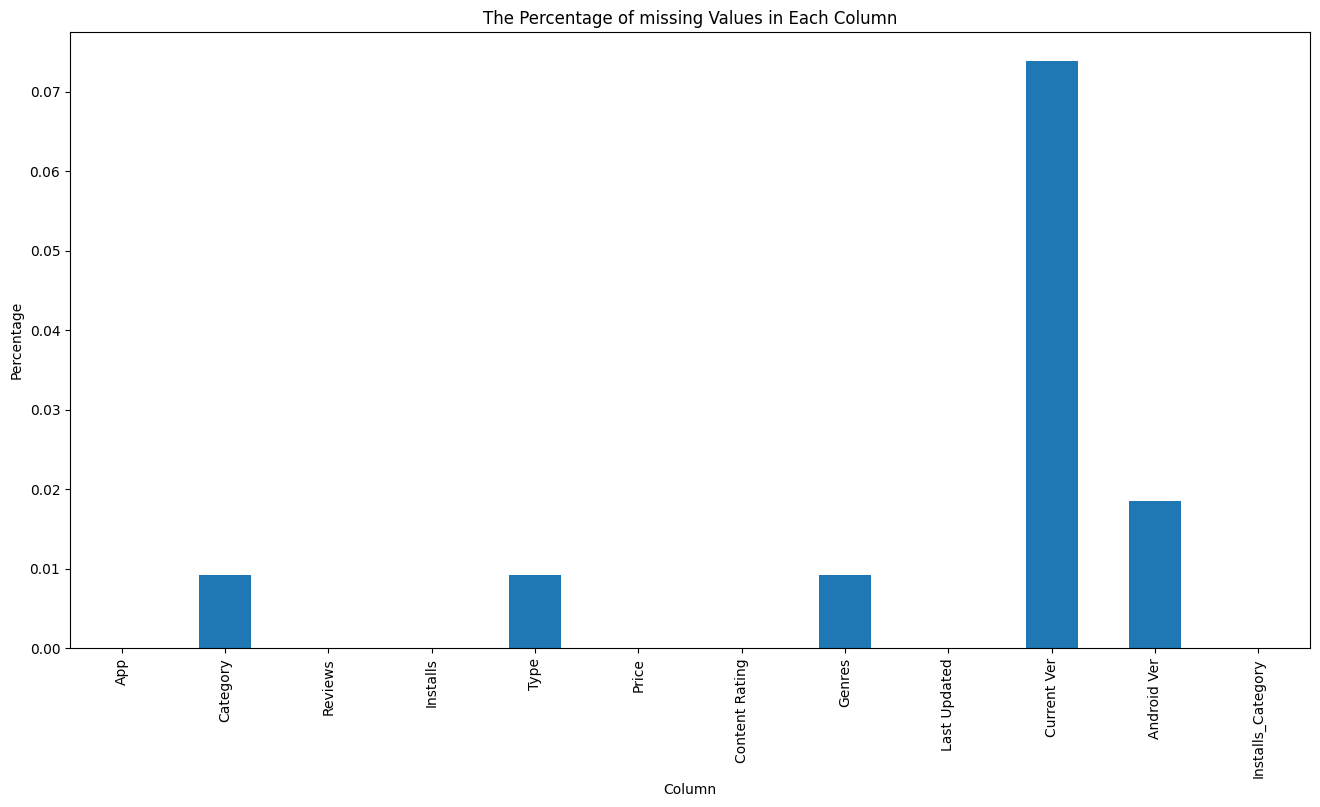

In [ ]:
percentage_missing=df.isnull().sum()/len(df)*100
plt.figure(figsize=(16,8))
percentage_missing[percentage_missing<1].plot(kind='bar')
# Add the label
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.title("The Percentage of missing Values in Each Column")

##### Coorelation Matrix of Numeric Columns of Dataset

In [ ]:
# Let's Check the Numeric Column,We can use describe function for this:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


<Axes: >

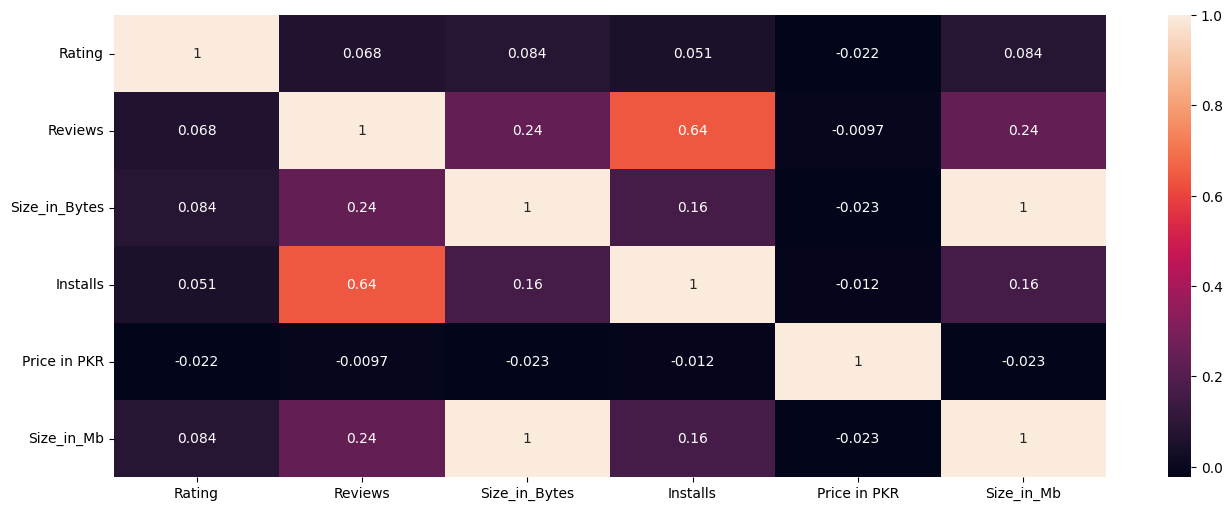

In [ ]:
# The Numeric Column are:Rating,Reviews,Size_in_Bytes,Installs,Price in PKR,Size_in_Mb
Numeric_cols=["Rating","Reviews","Size_in_Bytes","Installs","Price in PKR","Size_in_Mb"]
plt.figure(figsize=(16,6))
sns.heatmap(df[Numeric_cols].corr(),annot=True)

##### Correlation using SCipy Library

In [ ]:
pip install scipy

  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.4 MB ? eta -:--:--
    --------------------------------------- 0.8/38.4 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.3/38.4 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.8/38.4 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.8/38.4 MB 2.9 MB/s eta 0:00:13
   -- ------------------------------------- 2.6/38.4 MB 2.3 MB/s eta 0:00:16
   --- ------------------------------------ 2.9/38.4 MB 2.0 MB/s eta 0:00:18
   --- ------------------------------------ 3.1/38.4 MB 2.1 MB/s eta 0:00:18
   --- ------------------------------------ 3.7/38.4 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 3.9/38.4 MB 1.9 MB/s eta 0:00:18
   ---- ----------------------------------- 4.5/38.4 MB 2.0 MB/s eta 0:00:18
   ---- -----------

In [ ]:
from scipy import stats

In [ ]:
df_clean=df.dropna()
Pearson_r=stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])

In [ ]:
print(f"Pearson R between Reviews and Installs is :{Pearson_r}")

Pearson R between Reviews and Installs is :PearsonRResult(statistic=np.float64(0.5957475479511637), pvalue=np.float64(0.0))


#### Dealing with Missing values of Columns which have less than 1%

In [ ]:
# Check the Null Values of whole Dataset
df.isnull().sum()

App                     0
Category                0
Rating                 14
Reviews                 0
Size_in_Bytes        1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Size_in_Mb           1694
Installs_Category       0
dtype: int64

In [ ]:
# check the length of rows 
df.shape[0]

10841

In [ ]:
df.dropna(subset=['Current Ver','Category','Type','Genres','Android Ver'],inplace=True)

In [ ]:
df.shape[0]

10829

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes        1694
Size_in_Mb           1694
Rating                 14
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_Category       0
dtype: int64

In [ ]:
# The trend of Rating in each Installs category
df.groupby('Installs_Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [ ]:
df['Rating'].isnull().sum()

np.int64(0)

In [ ]:
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
no                    0
Very Low              0
Low                   0
Moderate              0
More than Moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

##### 4.4 Let's Impute the missing Values of Rating Column Based on the Installs_Category

In [ ]:
mean_rating_by_category = {
'no':	np.nan,
'Very Low':4.637037,
'Low':4.170970,	
'Moderate':	4.035417,
'More than Moderate':4.093255,	
'High':4.207525,
'Very High':4.287076,
'Top Notch':4.374396	
}
# Function to fill missing Rating values based on Installs_Category
def fill_missing_rating(row):
    if pd.isna(row['Rating']):
        return mean_rating_by_category[row['Installs_Category']]
    else:
        return row['Rating']

# Apply the function to fill missing Rating values
df['Rating'] = df.apply(fill_missing_rating, axis=1)

##### Plot the boxplot of Rating in Each Installs_Category

<Axes: xlabel='Installs_Category', ylabel='Rating'>

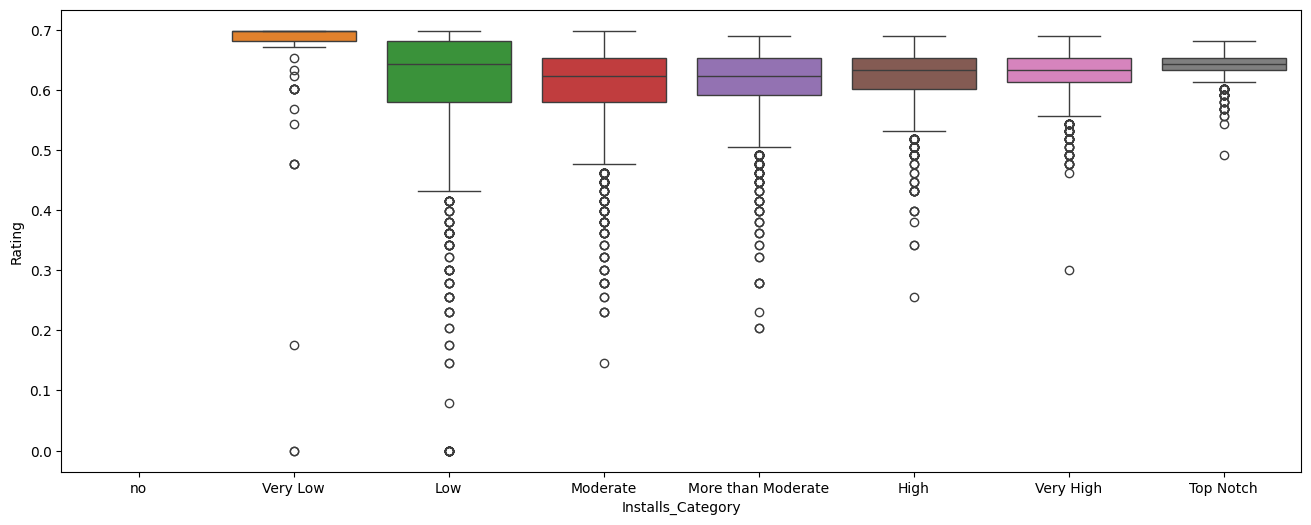

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_Category',hue='Installs_Category',y=np.log10(df['Rating']),data=df)

##### 4.5 Let's check if there is Any similar link with Reviews as well.

In [ ]:
df['Installs_Category'].loc[df['Reviews'].isnull()].value_counts()

Installs_Category
no                    0
Very Low              0
Low                   0
Moderate              0
More than Moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

<Axes: xlabel='Installs_Category', ylabel='Reviews'>

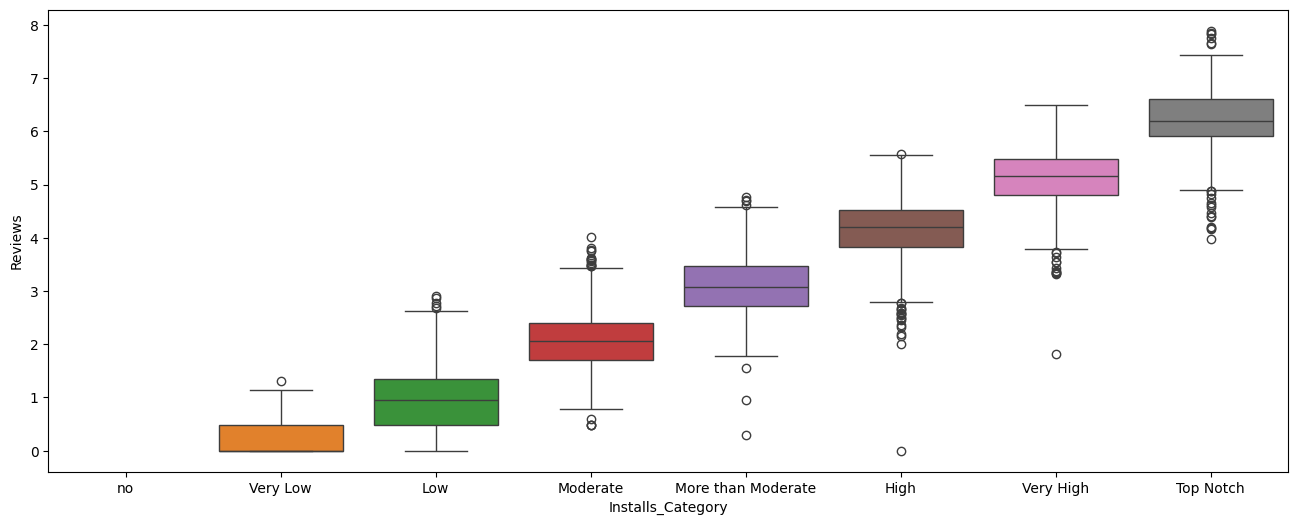

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_Category',hue='Installs_Category',y=np.log10(df['Reviews']),data=df)

##### Draw the Scatter plot of the Rating and Reviews column with the Install Column

<Axes: xlabel='Rating', ylabel='Reviews'>

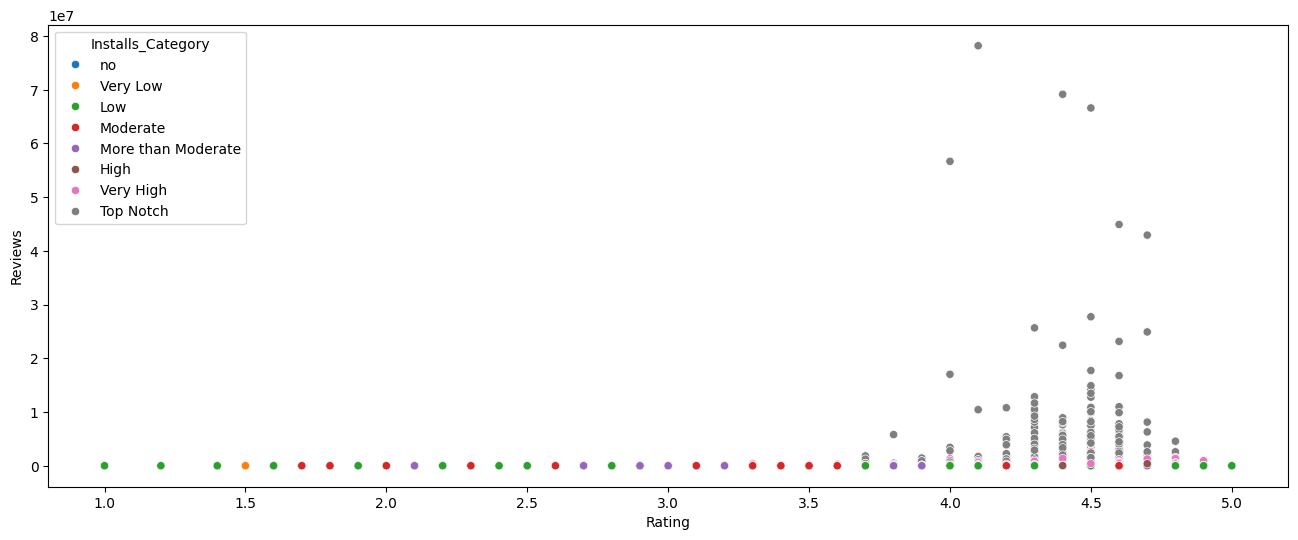

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y='Reviews',hue='Installs_Category',data=df)

##### We does not show any trend because because we should know that Rating is a categorical variable (ordinal) therefore we can't plot them together.

#### Let's Try with Reviews and Installs,Plot Reviews and Installs in a Scatter Plot

<Axes: xlabel='Reviews', ylabel='Installs'>

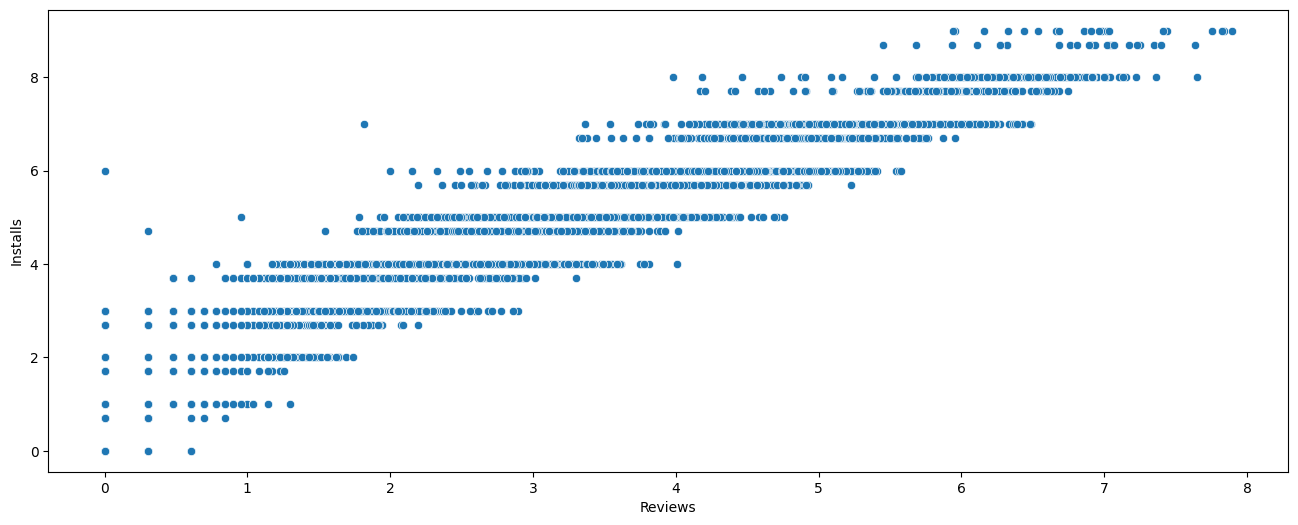

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(y=np.log10(df['Installs']),x=np.log10(df['Reviews']),data=df)

##### Let's check the duplicates in the dataset

In [ ]:
df['App'].duplicated().sum()

np.int64(1181)

In [ ]:
df.duplicated().sum()

np.int64(0)

##### Let's Check the Duplicates in Each Column

In [ ]:
for col in df.columns:
    print(f"Duplicates in {col} Column are {df[col].duplicated().sum()}")

Duplicates in App Column are 0
Duplicates in Category Column are 9626
Duplicates in Rating Column are 9620
Duplicates in Reviews Column are 4330
Duplicates in Size_in_Bytes Column are 9200
Duplicates in Installs Column are 9640
Duplicates in Type Column are 9657
Duplicates in Price Column are 9568
Duplicates in Content Rating Column are 9654
Duplicates in Genres Column are 9541
Duplicates in Last Updated Column are 8283
Duplicates in Current Ver Column are 6842
Duplicates in Android Ver Column are 9626
Duplicates in Size_in_Mb Column are 9200
Duplicates in Installs_Category Column are 9652


##### see the Duplicates if they are real

In [ ]:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_Category


##### Remove the Duplicates from Dataset

In [ ]:
df.drop_duplicates(subset=['App'],inplace=True)

In [ ]:
df['App'].drop_duplicates(inplace=True)

<Figure size 1600x600 with 0 Axes>

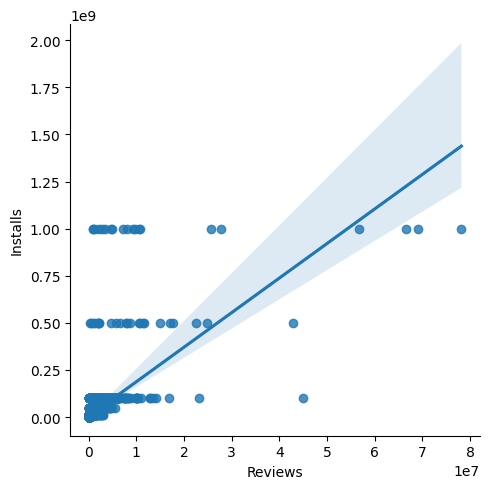

In [ ]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews',y='Installs',data=df)

#### 5. Insights from Data

In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than Moderate


##### 5.1 Category Analysis:

Which category exhibits the highest number of application installations?

In [ ]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001271905
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427881405
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

##### 5.2 Rating and Installation Category Correlation:

How does the average rating vary across different installation categories?

In [ ]:
df.groupby('Installs_Category')['Rating'].mean().sort_values(ascending=False)

Installs_Category
Very Low              4.637037
Top Notch             4.353456
Very High             4.271049
High                  4.203866
Low                   4.170172
More than Moderate    4.095442
Moderate              4.031782
no                         NaN
Name: Rating, dtype: float64

##### 5.3 Content Rating and Installation Volume:

Is there a discernible variation in the number of installations with respect to the content rating?

In [ ]:
df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

Content Rating
Everyone           52177775851
Teen               16487275393
Everyone 10+        4016271795
Mature 17+          2437986878
Adults only 18+        2000000
Unrated                  50500
Name: Installs, dtype: int64

##### 5.4 Application Size and Installation Numbers:

Does the size of an application influence the number of installations?

In [ ]:
df.groupby('Size_in_Mb')['Installs'].sum().sort_values(ascending=False)

Size_in_Mb
13.000000     1598251835
76.000000     1084110150
24.000000     1028222460
17.000000      992905856
11.000000      952562201
70.000000      793173100
40.000000      787317270
74.000000      627110600
57.000000      603611000
14.000000      598582184
12.000000      565346490
52.000000      557720150
62.000000      557551810
61.000000      534722510
25.000000      495446581
16.000000      480366958
15.000000      464582521
99.000000      435660050
53.000000      421447110
37.000000      407258000
50.000000      394483100
35.000000      374756210
32.000000      333704271
51.000000      332703000
23.000000      332051961
29.000000      331154268
21.000000      316548061
97.000000      312611000
26.000000      309583357
58.000000      306651000
33.000000      306502330
49.000000      300842660
47.000000      293638030
78.000000      281211000
45.000000      279332160
22.000000      275943705
27.000000      273987560
59.000000      271852100
34.000000      260365810
42.000000     

##### 5.5 User Preference for Free Applications:

To what extent do users prefer free applications?

In [ ]:
df.groupby('Type')['Installs'].sum().sort_values(ascending=False)

Type
Free    75064046546
Paid       57313871
Name: Installs, dtype: int64

<Axes: xlabel='Type', ylabel='Installs'>

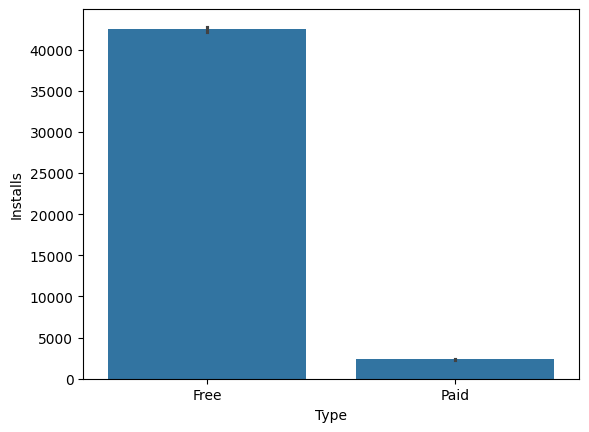

In [ ]:
sns.barplot(x='Type',y=np.log10(df['Installs']),data=df,estimator=sum)

##### 5.6 Price and Installation Volume:

Does the number of installations vary significantly with the price of an application?

In [ ]:
df.groupby('Price in PKR')['Installs'].sum().sort_values(ascending=False)

Price in PKR
0.0         75064046546
267.3          19337363
1887.3         11133100
807.3          10190022
537.3           4001131
1347.3          3434680
1617.3          2773912
672.3           1738831
1077.3          1609251
2697.3           484600
1212.3           416600
402.3            292159
942.3            211610
2427.3           200555
107997.3         188100
3237.3           160000
2157.3           132100
4047.3           132060
6747.3           110100
3777.3           100000
1066.5           100000
2430.0           100000
783.0            100000
5397.3            52020
8097.3            52020
1287.9            50000
1482.3            11030
2700.0            11000
4587.3            11000
270.0             10500
4857.3            10500
3507.3            10300
699.3             10000
796.5             10000
324.0             10000
429.3             10000
885.6             10000
1053.0            10000
80997.3           10000
105297.3          10000
5127.3            10000
108

##### 5.7 User Engagement with Application Updates:

Do users demonstrate a significant concern for application updates?

In [ ]:
df.groupby("Last Updated")['Installs'].sum().sort_values(ascending=False)

Last Updated
August 3, 2018        9588329945
August 6, 2018        7479236710
August 1, 2018        6237368504
July 31, 2018         5952036049
August 2, 2018        5300853993
July 26, 2018         2503846151
July 30, 2018         2132316846
July 12, 2018         1836429516
August 4, 2018        1701138455
July 5, 2018          1589005070
July 16, 2018         1509341636
July 19, 2018         1439845933
July 18, 2018         1430406765
July 25, 2018         1085694941
July 21, 2018         1062038760
July 11, 2018          929804332
July 27, 2018          850561877
July 23, 2018          784019141
May 25, 2018           767967160
July 24, 2018          712448266
June 8, 2018           656891160
May 23, 2018           650384850
July 3, 2018           608999530
July 20, 2018          552279151
June 28, 2018          436601320
July 10, 2018          396351870
July 2, 2018           380601920
June 11, 2018          359038235
June 27, 2018          329925965
July 29, 2018          2844743

##### 5.8 Review Quality and Application Size/Performance:

Is a high review rating directly proportional to a minimum application size? In other words, does a smaller application size generally lead to better performance across a wider range of devices, consequently resulting in higher ratings?

In [ ]:
df.groupby('Size_in_Mb')['Reviews'].sum().sort_values(ascending=False)

Size_in_Mb
98.000000     45484703
74.000000     33070777
97.000000     32583530
40.000000     31903232
76.000000     30774205
14.000000     30391263
17.000000     26309532
99.000000     25569988
52.000000     24902094
24.000000     24732534
15.000000     24399434
94.000000     20724429
53.000000     17196887
63.000000     15963167
32.000000     15070107
16.000000     14769354
26.000000     14211124
58.000000     13490419
11.000000     13301910
70.000000     13110717
95.000000     12983784
34.000000     12695982
51.000000     12602529
67.000000     12390883
96.000000     12223692
88.000000     12036925
57.000000     12031477
25.000000     11953188
85.000000     11781623
100.000000    11752564
92.000000     11445920
13.000000     11106121
50.000000     10939971
62.000000     10848607
59.000000     10344867
55.000000     10323802
37.000000     10294154
21.000000      9884427
68.000000      9187081
49.000000      8886127
12.000000      8667601
82.000000      8604678
33.000000      8484692


##### 5.9 Genre and Installation Volume:

Which genres exhibit the highest number of installations?

In [ ]:
df.groupby("Genres")['Installs'].sum().sort_values(ascending=False)

Genres
Communication                            11038276251
Tools                                     7991271905
Productivity                              5793091369
Social                                    5487867902
Photography                               4649147655
Video Players & Editors                   3916902720
Arcade                                    3755129155
Action                                    3483039190
Casual                                    3052830740
Entertainment                             3014704684
Travel & Local                            2894787146
News & Magazines                          2369217760
Books & Reference                         1665968576
Personalization                           1532483782
Sports                                    1412474498
Shopping                                  1400348785
Racing                                    1400247320
Health & Fitness                          1144022512
Strategy                               

##### 5.10 : 5.10 Top Applications:

Identify the top 5 free applications by a relevant metric (e.g., number of installs, rating).

In [ ]:
# top 5 free apps
df[df['Price in PKR'] == 0].sort_values(by='Installs', ascending=False).head(5)[['App','Installs','Rating','Reviews']]

,App,Installs,Rating,Reviews
152,Google Play Books,1000000000,3.9,1433233
338,Google Chrome: Fast & Secure,1000000000,4.3,9642995
335,Messenger – Text and Video Chat for Free,1000000000,4.0,56642847
865,Google Play Games,1000000000,4.3,7165362
340,Gmail,1000000000,4.3,4604324


##### 5.11 Top Applications:

Identify the top 5 paid applications by a relevant metric (e.g., number of installs, rating).

In [ ]:
# Let's Check the top 5 paid apps
df[df['Price in PKR'] > 0].sort_values(by='Installs', ascending=False).head(5)[['App','Installs','Rating','Reviews']]

,App,Installs,Rating,Reviews
4034,Hitman Sniper,10000000,4.6,408292
2241,Minecraft,10000000,4.5,2376564
5578,Sleep as Android Unlock,1000000,4.5,23966
9170,Stickman Legends: Shadow Wars,1000000,4.4,38419
9165,League of Stickman 2018- Ninja Arena PVP(Dream...,1000000,4.4,32496


##### 5.12 Rating and Installation Volume Relationship:

Is there a dependency between an application's rating and its number of installations?

In [ ]:
df.groupby("Genres")['Rating'].mean().sort_values(ascending=False)

Genres
Board;Pretend Play                       4.800000
Comics;Creativity                        4.800000
Health & Fitness;Education               4.700000
Adventure;Brain Games                    4.600000
Puzzle;Education                         4.600000
Strategy;Action & Adventure              4.600000
Entertainment;Creativity                 4.533333
Music;Music & Video                      4.533333
Strategy;Education                       4.500000
Racing;Pretend Play                      4.500000
Tools;Education                          4.500000
Arcade;Pretend Play                      4.500000
Casual;Brain Games                       4.475000
Role Playing;Action & Adventure          4.425000
Entertainment;Education                  4.400000
Puzzle;Creativity                        4.400000
Strategy;Creativity                      4.400000
Events                                   4.394346
Art & Design                             4.373371
Puzzle;Brain Games                       4.

##### 5.13 Application Size (in Mb) and Review Count:

Is there a relationship between the application size (in bytes) and the number of reviews? Do larger applications generally tend to receive more reviews?

In [ ]:
df.groupby('Size_in_Mb')['Reviews'].sum().sort_values(ascending=False)

Size_in_Mb
98.000000     45484703
74.000000     33070777
97.000000     32583530
40.000000     31903232
76.000000     30774205
14.000000     30391263
17.000000     26309532
99.000000     25569988
52.000000     24902094
24.000000     24732534
15.000000     24399434
94.000000     20724429
53.000000     17196887
63.000000     15963167
32.000000     15070107
16.000000     14769354
26.000000     14211124
58.000000     13490419
11.000000     13301910
70.000000     13110717
95.000000     12983784
34.000000     12695982
51.000000     12602529
67.000000     12390883
96.000000     12223692
88.000000     12036925
57.000000     12031477
25.000000     11953188
85.000000     11781623
100.000000    11752564
92.000000     11445920
13.000000     11106121
50.000000     10939971
62.000000     10848607
59.000000     10344867
55.000000     10323802
37.000000     10294154
21.000000      9884427
68.000000      9187081
49.000000      8886127
12.000000      8667601
82.000000      8604678
33.000000      8484692


##### 5.14 Content Rating and Average Rating:

What is the average rating for each content rating category?

In [ ]:
df.groupby("Content Rating")['Rating'].mean().sort_values(ascending=False)

Content Rating
Adults only 18+    4.300000
Teen               4.235397
Everyone 10+       4.227462
Everyone           4.189106
Mature 17+         4.140533
Unrated            4.135485
Name: Rating, dtype: float64

<Axes: xlabel='Android Ver'>

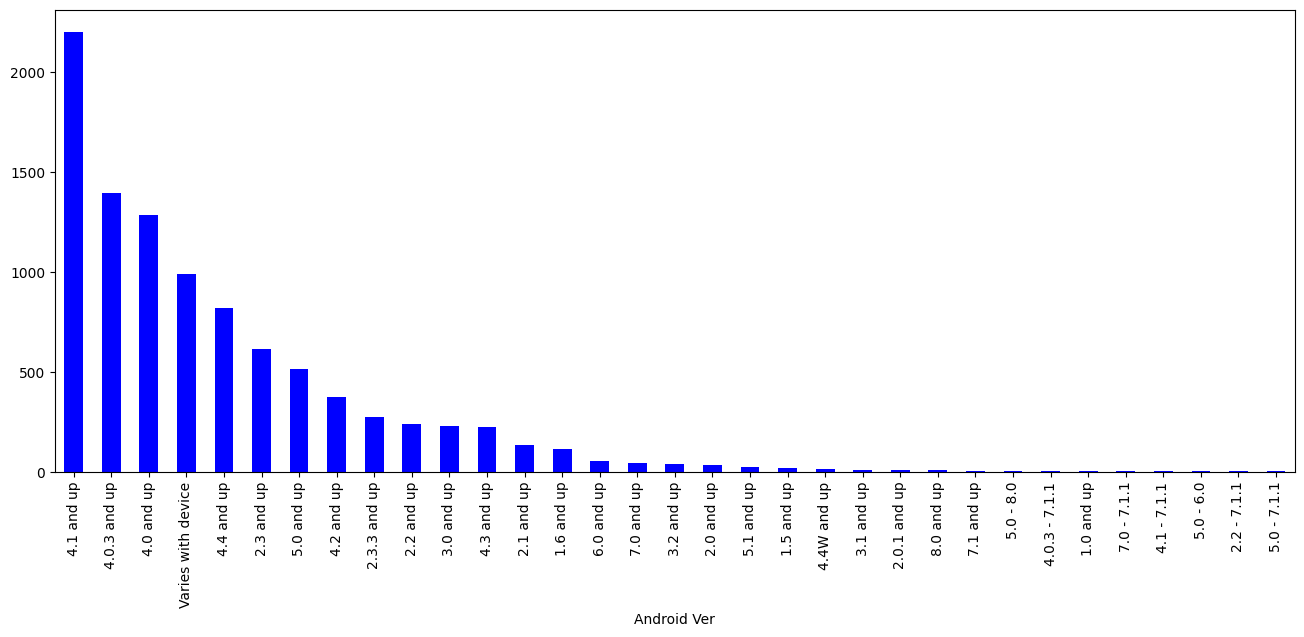

In [ ]:
#What is the distribution of Android Ver supported by the apps?
df['Android Ver'].value_counts(ascending=False)
df['Android Ver'].value_counts(ascending=False).plot(kind='bar', figsize=(16,6), color='blue')
